## SEAI 2022 - Python - Lab 4
# Spatial data and W matrices

Vincenzo Nardelli - vincnardelli@gmail.com - https://github.com/vincnardelli



Before to start... install Python Libraries!

In [1]:
! pip install pysal
! pip install cartoframes 
! pip install --user urllib3==1.22

     |████████████████████████████████| 2.4MB 11.2MB/s 
     |████████████████████████████████| 112kB 39.5MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 92kB 9.8MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 215kB 35.8MB/s 
     |████████████████████████████████| 5.7MB 15.2MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 143kB 44.6MB/s 
     |████████████████████████████████| 235kB 44.4MB/s 
     |████████████████████████████████| 235kB 47.8MB/s 
     |████████████████████████████████| 57.4MB 66kB/s 
     |████████████████████████████████| 1.0MB 35.2MB/s 
     |████████████████████████████████| 1.0MB 30.8MB/s 
     |████████████████████████████████| 19.3MB 245kB/s 
     |████████████████████████████████| 2.0MB 25.3MB/s 
     

     |████████████████████████████████| 245kB 8.4MB/s 
     |████████████████████████████████| 245kB 29.4MB/s 
     |████████████████████████████████| 133kB 38.9MB/s 
  Created wheel for pyrestcli: filename=pyrestcli-0.6.11-cp37-none-any.whl size=8500 sha256=059b27982261a0e0d84cd8066b5807f22b318e373ff1c675d8894cba9279d514
  Stored in directory: /root/.cache/pip/wheels/2f/bb/11/396a62e2d1e718f2bfb02b66726240fbc8d98640bfc0cf1688
Successfully built pyrestcli
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.25.11 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.5
    Uninstalling urllib3-1.26.5:
      Successfully uninstalled urllib3-1.26.5
     |████████████████████████████████| 133kB 9.0MB/s 
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.22 which is incompatible.
ERROR: datascience 0.10.6 has requirement fo

Remember to restart the runtime to load correctly the installed libraries!

Now, we download from the web the dataset for this lab.

In [1]:
! wget https://geodacenter.github.io/data-and-lab//data/columbus.zip
! unzip columbus.zip
! wget https://geodacenter.github.io/data-and-lab//data/boston.zip
! unzip boston.zip
! wget https://geodacenter.github.io/data-and-lab//data/kingcounty.zip
! unzip kingcounty.zip
! wget https://github.com/vincnardelli/seai/raw/main/lab4/data/dataNUTS3.zip
! unzip dataNUTS3.zip

--2021-06-02 16:01:39--  https://geodacenter.github.io/data-and-lab//data/columbus.zip
Resolving geodacenter.github.io (geodacenter.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to geodacenter.github.io (geodacenter.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472230 (461K) [application/zip]
Saving to: ‘columbus.zip’

columbus.zip        100%[===================>] 461.16K  --.-KB/s    in 0.02s   

2021-06-02 16:01:39 (18.8 MB/s) - ‘columbus.zip’ saved [472230/472230]

Archive:  columbus.zip
   creating: columbus/
  inflating: columbus/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/columbus/
  inflating: __MACOSX/columbus/._.DS_Store  
  inflating: columbus/columbus.csv   
  inflating: __MACOSX/columbus/._columbus.csv  
  inflating: columbus/columbus.dbf   
  inflating: __MACOSX/columbus/._columbus.dbf  
   creating: columbus/columbus.gdb/
  inflating: columbus/columbus.gdb/a00000001.

Let's start!

# Loading and Plotting spatial data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("dataNUTS3/dataNUTS3.csv")
data.head()

,NUTS_ID,year,alpine,category,pcgdp,employ_1564,employ_1564_male,employ_1564_female,employ_5564,unempl,educ_2564,fertility,pop,pop_dens,ppopGE65,ppopLT15,research_exp,state
0,AT113,1977,No,Predominantly rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT
1,AT112,1977,No,Predominantly rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT
2,AT111,1977,No,Predominantly rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT
3,AT111,1978,No,Predominantly rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT
4,AT112,1978,No,Predominantly rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT


In [5]:
data = data.loc[data['year']==2012]
data.head()

,NUTS_ID,year,alpine,category,pcgdp,employ_1564,employ_1564_male,employ_1564_female,employ_5564,unempl,educ_2564,fertility,pop,pop_dens,ppopGE65,ppopLT15,research_exp,state
105,AT111,2012,No,Predominantly rural,20600.0,70.4,75.9,64.8,38.7,4.6,13.9,1.30,37561.0,54.1,0.210884,0.126993,NaN,AT
106,AT113,2012,No,Predominantly rural,22900.0,70.4,75.9,64.8,38.7,4.6,13.9,1.30,97721.0,67.4,0.200735,0.128099,NaN,AT
107,AT112,2012,No,Predominantly rural,28500.0,70.4,75.9,64.8,38.7,4.6,13.9,1.30,150500.0,99.0,0.187960,0.136744,NaN,AT
362,AT127,2012,No,Predominantly urban,43200.0,72.6,77.2,68.1,42.9,4.6,17.2,1.49,320945.0,223.1,0.186381,0.147617,NaN,AT
363,AT124,2012,No,Predominantly rural,25300.0,72.6,77.2,68.1,42.9,4.6,17.2,1.49,219354.0,48.1,0.206958,0.135202,NaN,AT


In [6]:
data.describe()

,year,pcgdp,employ_1564,employ_1564_male,employ_1564_female,employ_5564,unempl,educ_2564,fertility,pop,pop_dens,ppopGE65,ppopLT15,research_exp
count,1474.0,1240.000000,1398.000000,1398.000000,1398.000000,1398.000000,1397.000000,1398.000000,1358.000000,1.325000e+03,1372.000000,1323.000000,1323.000000,805.000000
mean,2012.0,26665.196617,65.765379,71.822532,59.724535,51.398641,8.743522,26.199928,1.593675,4.116850e+05,437.668659,0.183848,0.156838,1.371652
std,0.0,14948.025774,9.474021,7.892328,12.187490,11.899590,5.773396,8.612239,0.341548,5.986194e+05,1019.342152,0.042279,0.037709,1.011049
min,2012.0,1700.000000,28.300000,50.500000,6.500000,16.200000,2.700000,6.300000,1.060000,1.070700e+04,1.200000,0.026679,0.088176,0.070000
25%,2012.0,18675.000000,59.300000,66.900000,53.500000,40.700000,4.800000,19.300000,1.370000,1.490120e+05,64.175000,0.161477,0.134810,0.750000
50%,2012.0,25600.000000,67.050000,72.800000,62.600000,52.800000,7.400000,26.400000,1.460000,2.702010e+05,129.400000,0.187967,0.149737,1.190000
75%,2012.0,31900.000000,73.600000,78.200000,68.800000,61.850000,10.300000,32.200000,1.830000,4.993400e+05,323.125000,0.212095,0.170365,1.630000
max,2012.0,138156.096600,82.200000,87.800000,80.500000,79.100000,37.000000,51.200000,3.800000,1.362424e+07,21206.100000,0.294344,0.424929,11.050000


In [7]:
data['category'].describe()

count             1127
unique               3
top       Intermediate
freq               450
Name: category, dtype: object

In [8]:
data['category'].value_counts()

Intermediate           450
Predominantly rural    416
Predominantly urban    261
Name: category, dtype: int64

In [9]:
data['state'].value_counts()

DE    396
UK    173
IT    110
FR    101
TR     81
PL     72
ES     59
EL     52
BE     44
RO     42
NL     40
AT     35
BG     28
CH     26
PT     25
SE     21
HR     21
HU     20
NO     19
FI     19
CZ     14
SI     12
DK     11
LT     10
SK      8
MK      8
IE      8
LV      6
EE      5
MT      2
IS      2
LU      1
CY      1
LI      1
ME      1
Name: state, dtype: int64

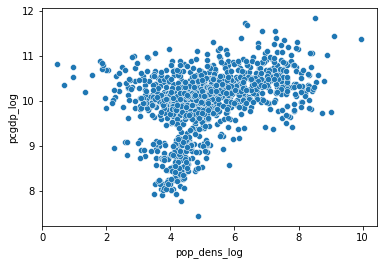

In [10]:
import seaborn as sns

data['pop_dens_log'] = np.log(data['pop_dens'])
data['pcgdp_log'] = np.log(data['pcgdp'])

sns.scatterplot(data=data, x="pop_dens_log", y="pcgdp_log")

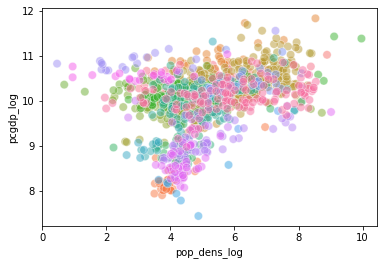

In [11]:
sns.scatterplot(data=data, x="pop_dens_log", y="pcgdp_log", hue="state", alpha=0.5, s=70, legend= False)

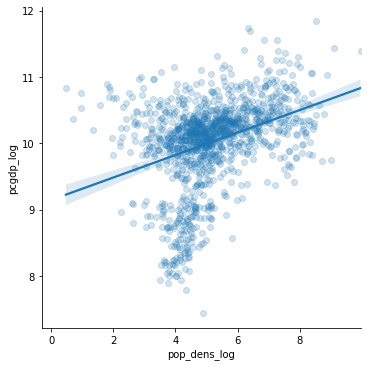

In [12]:
sns.lmplot(data=data, x="pop_dens_log", y="pcgdp_log", scatter_kws={'alpha':0.2})

## Areal data
GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

https://geopandas.org/

The core data structure in GeoPandas is geopandas.GeoDataFrame, a subclass of pandas.DataFrame able to store geometry columns and perform spatial operations. Geometries are handled by geopandas.GeoSeries, a subclass of pandas.Series. Therefore, your GeoDataFrame is a combination of Series with your data (numerical, boolean, text etc.) and GeoSeries with geometries (points, polygons etc.). You can have as many columns with geometries as you wish, there’s no limit typical for desktop GIS software.

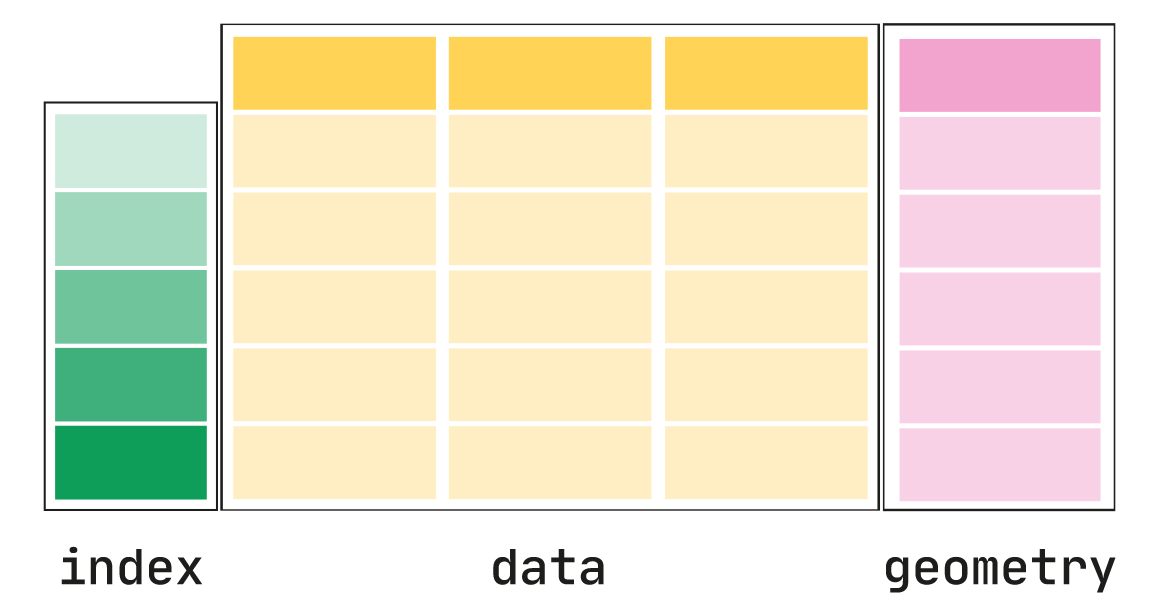



It's work with .geoJSON or PostGIS too!

In [13]:
import geopandas as gpd
gdf = gpd.read_file("dataNUTS3/NUTS_RG_10M_2013.shp")
gdf

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,NUTS_ID,STAT_LEVL_,SHAPE_AREA,SHAPE_LEN,geometry
0,AT,0,10.026017,23.934459,"POLYGON ((15.15733 48.99178, 15.16025 48.94169..."
1,AT1,1,2.850834,11.222485,"POLYGON ((15.15733 48.99178, 15.16025 48.94169..."
2,AT11,2,0.473189,5.822330,"POLYGON ((17.09271 48.09965, 17.06741 48.03144..."
3,AT111,3,0.086556,1.232223,"POLYGON ((16.64622 47.44660, 16.57575 47.40635..."
4,AT112,3,0.212046,2.811666,"POLYGON ((17.16080 48.00666, 17.09466 47.97087..."
...,...,...,...,...,...
1946,ITI33,3,0.305710,2.834500,"POLYGON ((13.66761 43.43056, 13.74297 43.29415..."
1947,ITI34,3,0.134340,1.916392,"POLYGON ((13.91552 42.89452, 13.71091 42.84333..."
1948,ITI35,3,0.097793,1.801067,"POLYGON ((13.84185 43.10317, 13.84945 43.06666..."
1949,ITI4,2,1.879270,9.269680,"POLYGON ((11.94108 42.68365, 12.03930 42.64881..."


In [14]:
gdf = gdf.merge(data, on="NUTS_ID", how="right")
gdf

,NUTS_ID,STAT_LEVL_,SHAPE_AREA,SHAPE_LEN,geometry,year,alpine,category,pcgdp,employ_1564,employ_1564_male,employ_1564_female,employ_5564,unempl,educ_2564,fertility,pop,pop_dens,ppopGE65,ppopLT15,research_exp,state,pop_dens_log,pcgdp_log
0,AT111,3,0.086556,1.232223,"POLYGON ((16.64622 47.44660, 16.57575 47.40635...",2012,No,Predominantly rural,20600.0,70.4,75.9,64.8,38.7,4.6,13.9,1.30,37561.0,54.1,0.210884,0.126993,NaN,AT,3.990834,9.933046
1,AT113,3,0.174587,2.299135,"POLYGON ((16.43376 47.35292, 16.48374 47.28760...",2012,No,Predominantly rural,22900.0,70.4,75.9,64.8,38.7,4.6,13.9,1.30,97721.0,67.4,0.200735,0.128099,NaN,AT,4.210645,10.038892
2,AT112,3,0.212046,2.811666,"POLYGON ((17.16080 48.00666, 17.09466 47.97087...",2012,No,Predominantly rural,28500.0,70.4,75.9,64.8,38.7,4.6,13.9,1.30,150500.0,99.0,0.187960,0.136744,NaN,AT,4.595120,10.257659
3,AT127,3,0.181179,2.698516,"POLYGON ((17.06674 48.11868, 17.03600 48.08430...",2012,No,Predominantly urban,43200.0,72.6,77.2,68.1,42.9,4.6,17.2,1.49,320945.0,223.1,0.186381,0.147617,NaN,AT,5.407620,10.673596
4,AT124,3,0.567886,3.891105,"POLYGON ((15.54245 48.90770, 15.75363 48.85218...",2012,No,Predominantly rural,25300.0,72.6,77.2,68.1,42.9,4.6,17.2,1.49,219354.0,48.1,0.206958,0.135202,NaN,AT,3.873282,10.138560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,UKN01,3,0.016042,0.553346,"POLYGON ((-5.91293 54.64804, -5.85534 54.63377...",2012,No,Predominantly urban,49100.0,66.0,69.9,62.2,55.9,7.4,32.1,2.03,280717.0,2567.4,0.146104,0.176997,1.57,UK,7.850649,10.801614
1470,UKN04,3,0.450038,4.684459,"POLYGON ((-5.97653 55.05660, -6.09788 54.98403...",2012,No,Intermediate,19100.0,66.0,69.9,62.2,55.9,7.4,32.1,2.03,289557.0,90.1,0.141979,0.199432,1.57,UK,4.500920,9.857444
1471,UKN03,3,0.471958,6.393123,"MULTIPOLYGON (((-5.99263 54.98926, -5.97045 54...",2012,No,Intermediate,21500.0,66.0,69.9,62.2,55.9,7.4,32.1,2.03,441222.0,141.1,0.154099,0.196744,1.57,UK,4.949469,9.975808
1472,UKN05,3,0.902413,6.631712,"POLYGON ((-6.50002 54.91871, -6.45709 54.82455...",2012,No,Predominantly rural,20300.0,66.0,69.9,62.2,55.9,7.4,32.1,2.03,415192.0,66.6,0.133822,0.213335,1.57,UK,4.198705,9.918376


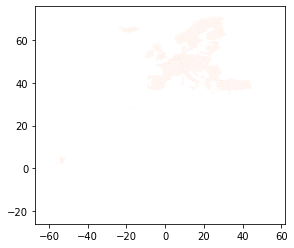

In [15]:
gdf.plot(column='pop_dens', cmap='Reds')

EQUAL INTERVAL divides the data into equal size classes (e.g., 0-10, 10-20, 20-30, etc.) and works best on data that is generally spread across the entire range. CAUTION: Avoid equal interval if your data are skewed to one end or if you have one or two really large outlier values.

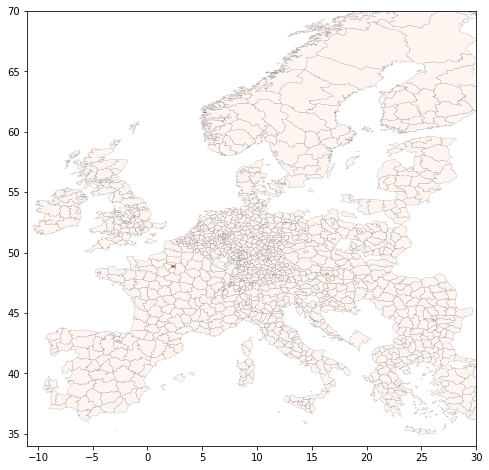

In [16]:
plt = gdf.plot(column='pop_dens', scheme='equal_interval', k=5, cmap='Reds', figsize=(10, 8), edgecolor='black',  linewidth=0.1)
plt.set_xlim(-11, 30)
plt.set_ylim(34, 70);

NATURAL BREAKS is a kind of “optimal” classification scheme that finds class breaks that will minimize within-class variance and maximize between-class differences. 

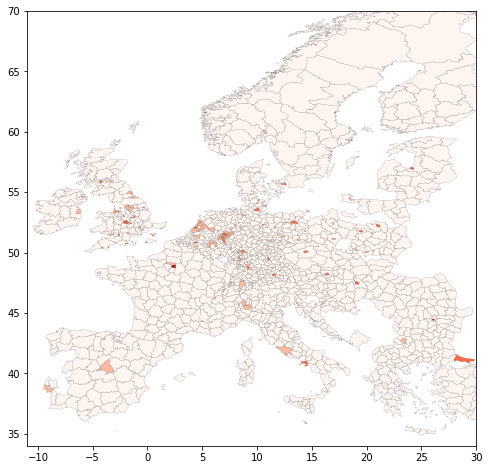

In [17]:
plt = gdf.plot(column='pop_dens', scheme='natural_breaks', k=5, cmap='Reds', figsize=(10, 8), edgecolor='black',  linewidth=0.1)
plt.set_xlim(-11, 30)
plt.set_ylim(34, 70);

QUANTILES will create attractive maps that place an equal number of observations in each class.


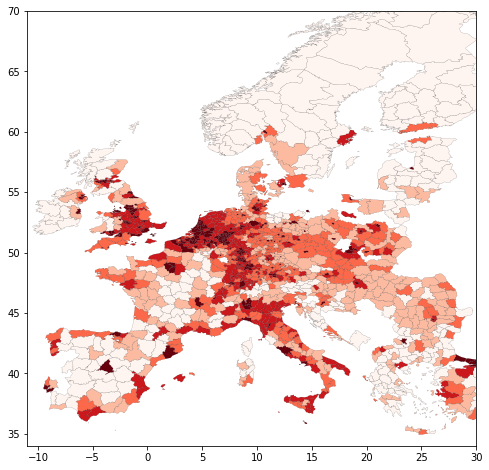

In [18]:
plt = gdf.plot(column='pop_dens', scheme='Quantiles', k=5, cmap='Reds',  figsize=(10, 8), edgecolor='black',  linewidth=0.1)
plt.set_xlim(-11, 30)
plt.set_ylim(34, 70);

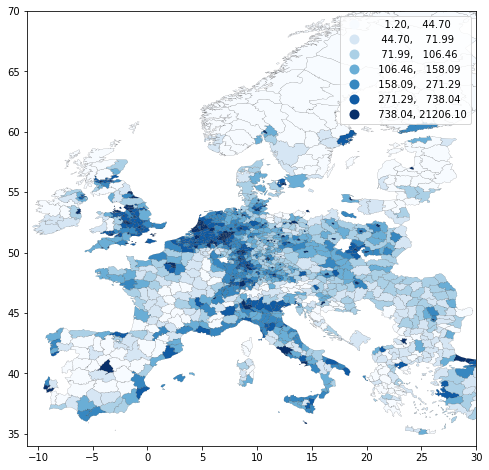

In [19]:
plt = gdf.plot(column='pop_dens', scheme='Quantiles', k=7, cmap='Blues',legend=True, figsize=(10, 8), edgecolor='black',  linewidth=0.1)
plt.set_xlim(-11, 30)
plt.set_ylim(34, 70);

### Interactive plots with Carto Frames

CARTOframes is a Python package for integrating CARTO maps, analysis, and data services into data science workflows.

https://carto.com/developers/cartoframes

In [20]:
from cartoframes.viz import Layer, color_bins_style, formula_widget, category_widget, histogram_widget
Layer(
    gdf,
    color_bins_style('pop_dens', palette='CB_BLUES', bins=5, opacity=0.8)
)

Output hidden; open in https://colab.research.google.com to view.

In [21]:
from cartoframes.viz import Layer, color_bins_style, formula_widget, category_widget, histogram_widget
Layer(
    gdf,
    color_bins_style('pop_dens', palette='CB_BLUES', bins=5, opacity=0.8),
    default_widget=True,
    default_popup_hover=False,
    widgets=[
        formula_widget('pop', 'sum', 'Population'),
        formula_widget('pcgdp', 'sum', 'Per capita GDP'),
        category_widget('category', 'Category'),

        histogram_widget('unempl', 'Population density'),

        histogram_widget('pop_dens', 'Population density'),
        category_widget('category', 'Category'),
        category_widget('alpine', 'Alpine')
    ]
)


Output hidden; open in https://colab.research.google.com to view.

## Point data

In [22]:
kc = gpd.read_file("kingcounty/kc_house.shp")
kc

,id,date,price,bedrooms,bathrooms,sqft_liv,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basmt,yr_built,yr_renov,zipcode,lat,long,sqft_liv15,sqft_lot15,geometry
0,7.129301e+09,20141013T000000,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,POINT (-122.25700 47.51120)
1,6.414100e+09,20141209T000000,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,POINT (-122.31900 47.72100)
2,5.631500e+09,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,POINT (-122.23300 47.73790)
3,2.487201e+09,20141209T000000,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,POINT (-122.39300 47.52080)
4,1.954401e+09,20150218T000000,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,POINT (-122.04500 47.61680)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,20140521T000000,360000.0,3.0,2.0,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,POINT (-122.34600 47.69930)
21609,6.600060e+09,20150223T000000,400000.0,4.0,2.0,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,POINT (-122.36200 47.51070)
21610,1.523300e+09,20140623T000000,402101.0,2.0,0.0,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,POINT (-122.29900 47.59440)
21611,2.913101e+08,20150116T000000,400000.0,3.0,2.0,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,POINT (-122.06900 47.53450)


Coordinate Reference Systems

A coordinate reference system (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data.

https://datacarpentry.org/organization-geospatial/03-crs/

In [23]:
kc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's try to do the same starting from non-projected non-spatial dataset from a csv file!

In [24]:
kc = pd.read_csv("kingcounty/kc_house_data.csv")
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
kc = gpd.GeoDataFrame(kc, geometry=gpd.points_from_xy(kc.long, kc.lat, crs=4326))
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


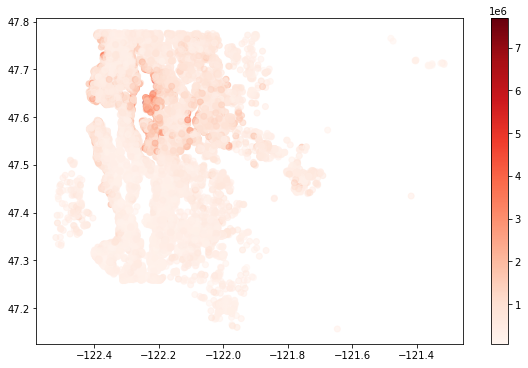

In [26]:
kc.plot(column='price', cmap='Reds', legend=True, alpha=0.5, figsize=(10, 6));

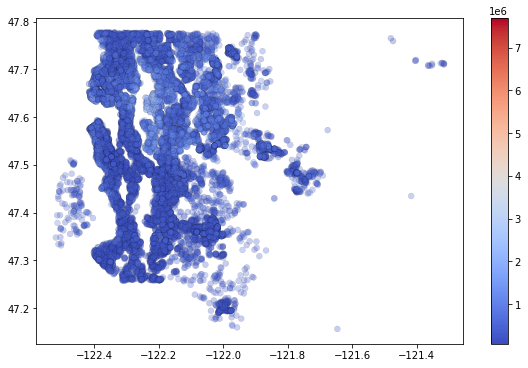

In [27]:
kc.plot(column='price', cmap='coolwarm', legend=True, alpha=0.3, figsize=(10, 6), edgecolor='black',  linewidth=0.2);

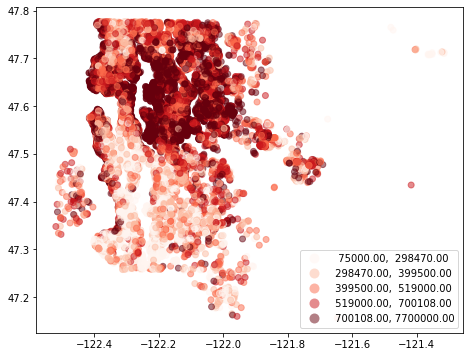

In [28]:
kc.plot(column='price', scheme='Quantiles', k=5, cmap='Reds', legend=True, alpha=0.5, figsize=(10, 6));

In [29]:
from cartoframes.viz import Layer, color_bins_style, formula_widget, category_widget, histogram_widget, popup_element
Layer(
    kc,
    color_bins_style('price', palette='CB_BLUES', bins=5, opacity=0.8),
    default_widget=True,
    default_popup_hover=False,
    widgets=[
        formula_widget('id', 'count', 'Houses'),
        histogram_widget('sqft_lot', 'Sqft'),
        histogram_widget('bedrooms', 'Bedrooms')],
    popup_hover=[
        popup_element('price'),
        popup_element('bedrooms'),
        popup_element('bathrooms')
    ]
)

# Computation of W matrix

https://pysal.org/packages/

## Creation of a W matrix for regular grid data
To start, consider the case of a regular square lattice grid of dimension (e. g.) 5-by-5.

In [30]:
from libpysal.weights import lat2W

w = lat2W(5, 5)
print(w)

In [31]:
w.n

25

In [32]:
w.neighbors

{0: [5, 1],
 1: [0, 6, 2],
 2: [1, 7, 3],
 3: [2, 8, 4],
 4: [3, 9],
 5: [0, 10, 6],
 6: [1, 5, 11, 7],
 7: [2, 6, 12, 8],
 8: [3, 7, 13, 9],
 9: [4, 8, 14],
 10: [5, 15, 11],
 11: [6, 10, 16, 12],
 12: [7, 11, 17, 13],
 13: [8, 12, 18, 14],
 14: [9, 13, 19],
 15: [10, 20, 16],
 16: [11, 15, 21, 17],
 17: [12, 16, 22, 18],
 18: [13, 17, 23, 19],
 19: [14, 18, 24],
 20: [15, 21],
 21: [16, 20, 22],
 22: [17, 21, 23],
 23: [18, 22, 24],
 24: [19, 23]}

In [33]:
w_card = pd.Series(w.cardinalities)
w_card.head()

0    2
1    3
2    3
3    3
4    2
dtype: int64

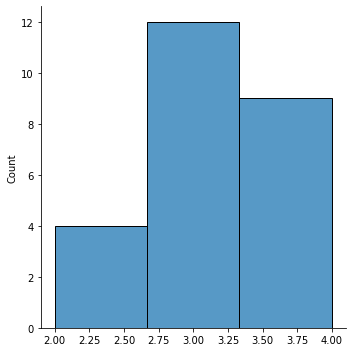

In [34]:
import seaborn as sns
sns.displot(w_card, bins=3);

## Creation of a W matrix for irregular data
In the case of irregular data, it is possible to import a GAL (.gal).

In [35]:
#gal = libpysal.io.open(libpysal.examples.get_path('name_of_gal_file.gal'),'r')
#w = gal.read()
#gal.close()

## Creation of W matrix from a GeoPandas GeoDataFrame

In [36]:
from libpysal.weights import Queen, Rook

columbus = gpd.read_file("columbus/columbus.shp")
columbus = columbus.to_crs(4326)
w_queen = Queen.from_dataframe(columbus)

In [37]:
w_queen.n

49

In [38]:
w_queen.neighbors

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3, 4],
 3: [1, 2, 4, 7],
 4: [2, 3, 5, 7, 8, 10, 14, 15],
 5: [8, 4],
 6: [11, 12, 13, 7],
 7: [3, 4, 6, 10, 11, 12],
 8: [4, 5, 9, 14, 19, 21, 24, 25],
 9: [16, 8, 19, 21],
 10: [4, 7, 11, 14, 15],
 11: [6, 7, 10, 12, 13, 15],
 12: [11, 13, 6, 7],
 13: [17, 18, 6, 11, 12, 15],
 14: [4, 8, 24, 10, 25, 15],
 15: [4, 10, 11, 13, 14, 17, 23, 24],
 16: [9, 19, 22],
 17: [18, 15, 13, 23],
 18: [17, 13, 23],
 19: [32, 34, 39, 8, 9, 16, 21, 22, 26, 31],
 20: [33, 29, 23],
 21: [19, 8, 9, 26, 27, 25],
 22: [16, 19, 31],
 23: [17, 18, 20, 24, 28, 29, 15],
 24: [8, 14, 15, 23, 25, 27, 28, 29],
 25: [21, 8, 24, 27, 28, 14],
 26: [32, 27, 19, 21],
 27: [32, 34, 36, 37, 21, 24, 25, 26, 28],
 28: [36, 37, 23, 24, 25, 27, 29],
 29: [20, 36, 23, 24, 28],
 30: [33, 35, 38],
 31: [40, 19, 22, 39],
 32: [26, 27, 34, 19],
 33: [41, 35, 20, 30],
 34: [32, 19, 37, 39, 27, 42, 43],
 35: [33, 38, 41, 45, 30],
 36: [37, 42, 27, 28, 29, 44],
 37: [34, 36, 43, 42, 27, 28],
 

In [39]:
w_queen[0]

{1: 1.0, 2: 1.0}

In [40]:
w_queen[0][1]

1.0

In [41]:
w_queen.mean_neighbors

4.816326530612245

In [42]:
w_queen.min_neighbors

2

In [43]:
w_queen.max_neighbors

10

In [44]:
w_queen.islands

[]

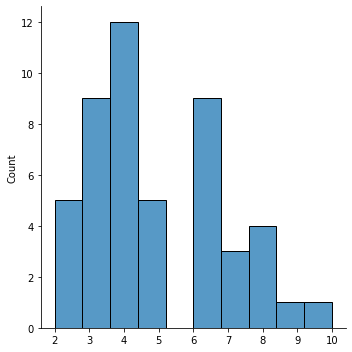

In [45]:
w_card = pd.Series(w_queen.cardinalities)
sns.displot(w_card, bins=10);

/usr/local/lib/python3.7/dist-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/usr/local/lib/python3.7/dist-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


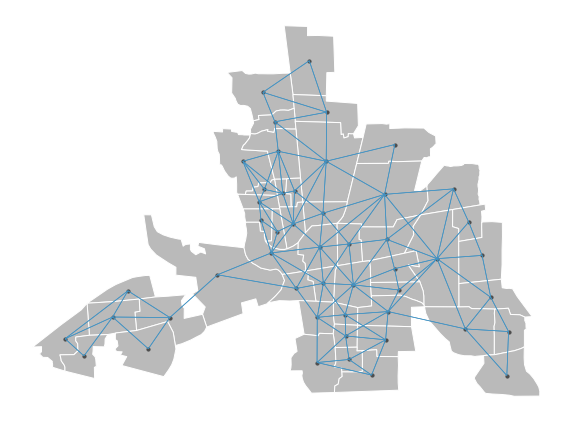

In [46]:
from splot.libpysal import plot_spatial_weights
plot_spatial_weights(w_queen, columbus);

/usr/local/lib/python3.7/dist-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/usr/local/lib/python3.7/dist-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


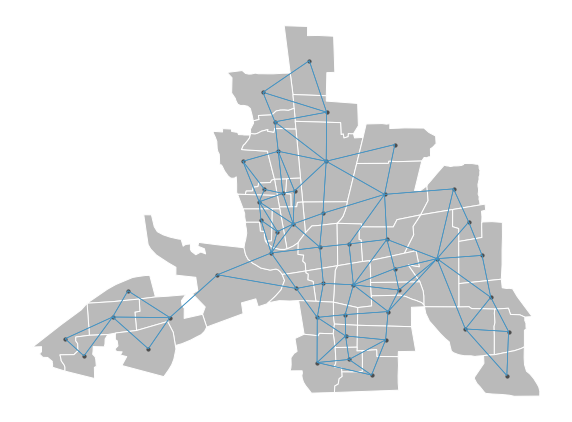

In [47]:
w_rook = Rook.from_dataframe(columbus)
plot_spatial_weights(w_rook, columbus);

In [48]:
w_queen.pct_nonzero

9.82923781757601

In [49]:
w_rook.pct_nonzero

8.329862557267806

## W Matrix for point data

In [51]:
boston = gpd.read_file("boston/boston.shp")
boston.head()

,ID,TOWN,TOWNNO,TRACT,LON,LAT,x,y,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,geometry
0,1.0,0.0,0.0,2011.0,-70.955,42.2550,338.73,4679.73,24.0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,POINT (338.730 4679.730)
1,2.0,0.0,1.0,2021.0,-70.950,42.2875,339.23,4683.33,21.6,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,POINT (339.230 4683.330)
2,3.0,0.0,1.0,2022.0,-70.936,42.2830,340.37,4682.80,34.7,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,POINT (340.370 4682.800)
3,4.0,0.0,2.0,2031.0,-70.928,42.2930,341.05,4683.89,33.4,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,POINT (341.050 4683.890)
4,5.0,0.0,2.0,2032.0,-70.922,42.2980,341.56,4684.44,36.2,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,POINT (341.560 4684.440)


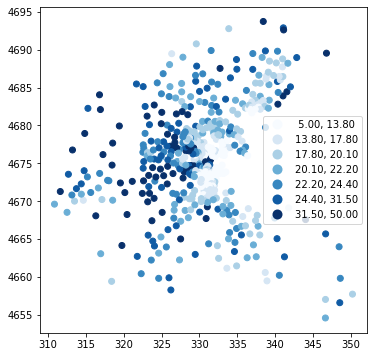

In [57]:
boston.plot(column="MEDV", figsize=(10, 6), scheme='Quantiles', k=7, cmap='Blues',legend=True)

### KNN
Creates nearest neighbor weights matrix based on k nearest neighbors.

In [58]:
from libpysal.weights import KNN

knn5 = KNN.from_dataframe(boston, k=5)
knn5

In [59]:
knn5.n

506

In [60]:
knn5.mean_neighbors

5.0

In [61]:
knn5.neighbors

{0: [31, 29, 34, 32, 28],
 1: [26, 27, 28, 29, 25],
 2: [1, 3, 29, 6, 28],
 3: [4, 6, 2, 5, 1],
 4: [3, 5, 6, 8, 7],
 5: [4, 3, 8, 9, 6],
 6: [3, 4, 7, 2, 1],
 7: [8, 10, 11, 9, 12],
 8: [7, 10, 9, 11, 5],
 9: [10, 8, 7, 11, 61],
 10: [8, 9, 7, 11, 61],
 11: [10, 49, 48, 7, 8],
 12: [47, 46, 7, 48, 11],
 13: [26, 14, 25, 15, 27],
 14: [17, 24, 25, 13, 15],
 15: [14, 16, 17, 13, 24],
 16: [15, 45, 17, 14, 18],
 17: [14, 21, 22, 23, 24],
 18: [19, 21, 20, 37, 17],
 19: [20, 21, 18, 33, 22],
 20: [33, 19, 21, 22, 34],
 21: [22, 20, 17, 33, 19],
 22: [23, 33, 21, 32, 20],
 23: [32, 22, 24, 30, 33],
 24: [30, 23, 25, 32, 14],
 25: [27, 26, 24, 30, 28],
 26: [25, 27, 13, 1, 28],
 27: [28, 25, 26, 30, 31],
 28: [27, 29, 31, 25, 26],
 29: [28, 27, 1, 31, 26],
 30: [24, 31, 23, 32, 25],
 31: [30, 32, 28, 24, 27],
 32: [23, 30, 22, 24, 33],
 33: [20, 22, 34, 21, 32],
 34: [33, 32, 20, 22, 23],
 35: [36, 19, 18, 20, 33],
 36: [35, 37, 18, 19, 38],
 37: [18, 38, 36, 19, 35],
 38: [37, 89, 87, 36, 

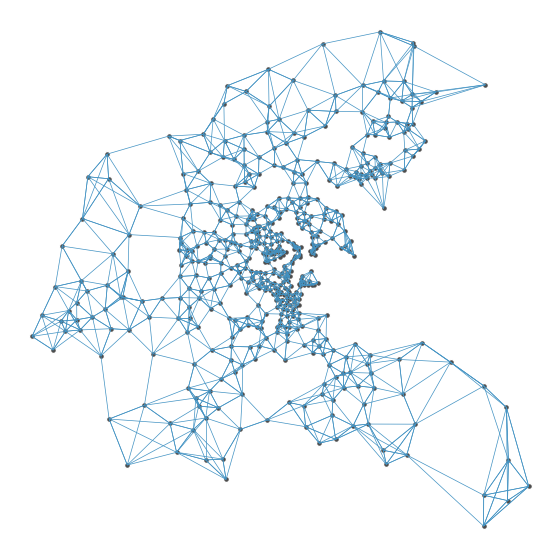

In [62]:
plot_spatial_weights(knn5, boston);

### Kernel Weights
Spatial weights based on kernel functions.

For **fixed bandwidth**, 
$$h_{i}=\max (d k n n) \forall i$$ where $d k n n$ is a vector of k-nearest neighbor distances (the distance to the kth nearest neighbor for each observation). 

For adaptive bandwidths, $$h_{i}=d k n n_{i}$$


**Kernel function defined as follows with:**
$$
z_{i, j}=d_{i, j} / h_{i}
$$
triangular
$$
K(z)=(1-|z|) i f|z| \leq 1
$$
uniform
$$
K(z)=1 / 2 \text { if }|z| \leq 1
$$
quadratic
$$
K(z)=(3 / 4)\left(1-z^{2}\right) i f|z| \leq 1
$$
quartic
$$
K(z)=(15 / 16)\left(1-z^{2}\right)^{2} i f|z| \leq 1
$$
gaussian
$$
K(z)=(2 \pi)^{(-1 / 2)} \exp \left(-z^{2} / 2\right)
$$

https://pysal.org/libpysal/generated/libpysal.weights.Kernel.html

In [63]:
from libpysal.weights import distance
w_kernel = distance.Kernel.from_dataframe(boston)

In [64]:
w_kernel.function

'triangular'

In [65]:
w_kernel.bandwidth[0:10]

array([[5.27056976],
       [5.27056976],
       [5.27056976],
       [5.27056976],
       [5.27056976],
       [5.27056976],
       [5.27056976],
       [5.27056976],
       [5.27056976],
       [5.27056976]])

In [66]:
w_kernel.weights[0]

[0.163551559050497,
 0.19181618325114325,
 0.09473389104628172,
 0.13092225033037153,
 0.07496742804829448,
 0.08191080022181252,
 0.1261552782976385,
 0.19097921738634083,
 0.1720602864115155,
 0.3010077516629547,
 0.10995087934229786,
 0.31958894493655776,
 0.2733728853634749,
 0.36773125208680824,
 0.27811466105273197,
 1.0,
 0.35814762302133973,
 0.4164829256867967,
 0.497978319440454,
 0.5124309808630476,
 0.5261957306180548,
 0.4742346749992036,
 0.2285687077374301,
 0.29823222830546314,
 0.17614003438822645,
 0.309349123035617,
 0.4617704592448053,
 0.2733134374315873,
 0.42287221770873373,
 0.27605558105763905,
 0.396646687116729,
 0.38536818952869667,
 0.20741404543113307,
 0.11238701394849415,
 0.37411750639295605,
 0.4722016578165268,
 0.32215713806517166,
 0.41625162522416426,
 0.31040541399739163,
 0.33961806947625883,
 0.06727845568338509,
 0.09626616719351899]

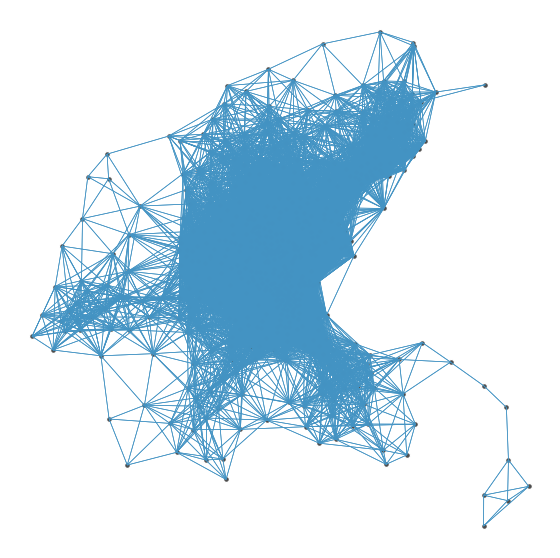

In [67]:
plot_spatial_weights(w_kernel, boston);

In [68]:
w_kernel_gaussian = distance.Kernel.from_dataframe(boston, function="gaussian", fixed=False, k=20)

In [69]:
w_kernel_gaussian.weights[0]

[0.3989422804014327,
 0.31705773159802025,
 0.3127930500228602,
 0.3082482854503523,
 0.30064563932915683,
 0.29998736630684864,
 0.2965929724745923,
 0.2837127108292177,
 0.28156780010707066,
 0.2814900153816355,
 0.27486510267232905,
 0.2710281274575302,
 0.2671846662070748,
 0.2649967458134385,
 0.2617059886370584,
 0.25532273799876404,
 0.2492897977719749,
 0.24840149007380918,
 0.24522374826057816,
 0.2448581503743604,
 0.2419707487162134]

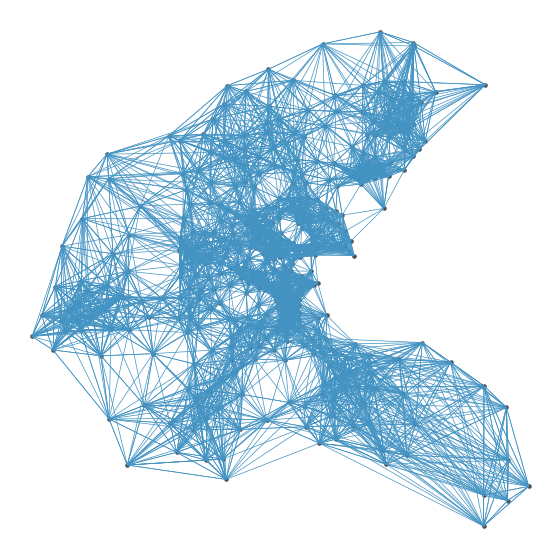

In [70]:
plot_spatial_weights(w_kernel_gaussian, boston);

### Distance

In [71]:
w_distance15 = distance.DistanceBand.from_dataframe(boston, 1.5, binary=True)

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 64 disconnected components.
 There are 49 islands with ids: 0, 40, 54, 55, 64, 65, 66, 67, 195, 196, 197, 198, 199, 200, 202, 203, 204, 252, 253, 254, 255, 256, 273, 283, 284, 285, 286, 287, 289, 291, 299, 301, 302, 303, 330, 335, 341, 342, 343, 344, 347, 348, 349, 350, 351, 352, 353, 354, 355.
  warnings.warn(message)


In [72]:
w_distance15.pct_nonzero

2.596509865800122

In [73]:
w_distance15.islands

[0,
 40,
 54,
 55,
 64,
 65,
 66,
 67,
 195,
 196,
 197,
 198,
 199,
 200,
 202,
 203,
 204,
 252,
 253,
 254,
 255,
 256,
 273,
 283,
 284,
 285,
 286,
 287,
 289,
 291,
 299,
 301,
 302,
 303,
 330,
 335,
 341,
 342,
 343,
 344,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355]

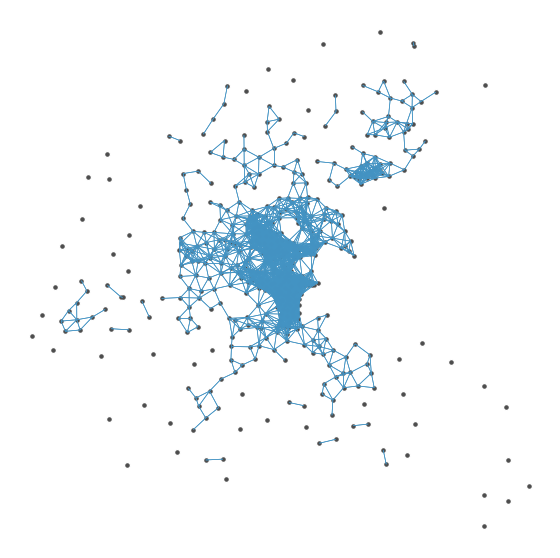

In [74]:
plot_spatial_weights(w_distance15, boston);

In [75]:
w_distance5 = distance.DistanceBand.from_dataframe(boston, 5, binary=True)

In [76]:
w_distance5.pct_nonzero

20.07139620990798

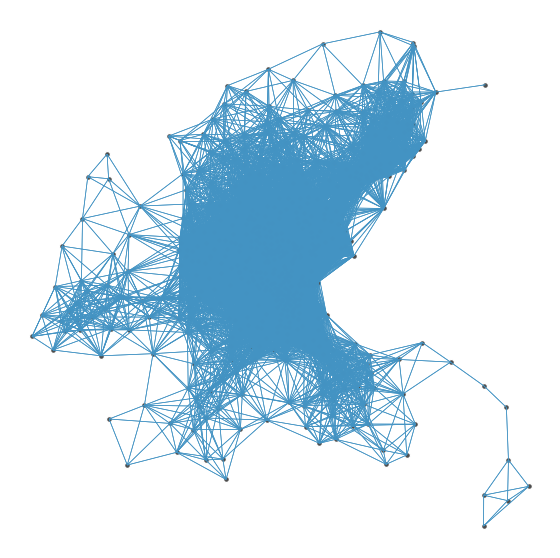

In [77]:
plot_spatial_weights(w_distance5, boston);